# Investigate a Dataset (TMDb Movie Data)
> The primary goal of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib. This contain four parts:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset
- I choose the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.
<br><br>
> **Contain: **
  - Total Rows = 10866
  - Total Columns = 21
  - After Seeing the dataset we can say that some columns is contain null values

### Questions
> 
1.  Which year has the highest release of movies?
2.  Which Movie Has The Highest Or Lowest Profit? Top 10 movies which earn highest profit?
3.  Movie with Highest And Lowest Budget? 
4.  Which movie made the highest revenue and lowest as well?
5.  Movie with shorest and longest runtime?
6.  Which movie get the highest or lowest votes (Ratings).
7.  Which Year Has The Highest Profit Rate?
8.  Which length movies most liked by the audiences according to their popularity?
9.  Average Runtime Of Movies From Year To Year?
10. How Does The Revenue And Popularity differs Budget And Runtime? And How Does Popularity Depends On Profit?
11. Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?
12. Which Genre Has The Highest Release Of Movies?
13. Which genres are most popular from year to year? 
14. Most Frequent star cast?
15. Top 20 Production Companies With Higher Number Of Release?
16. Life Time Profit Earn By Each Production Company?
17. Top 20 Director Who Directs Maximum Movies?
18. What kinds of properties are associated with movies that have high revenues?

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> After Observing the dataset and the questions related to this dataset for the analysis we will be keeping only relevent data and deleting the unused data.

### General Properties

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Read the CSV File Using Pandas read_csv function
reader = pd.read_csv('tmdb-movies.csv')   

# print the concise summery of the dataset
reader.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#print first two rows of the dataset
reader.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [8]:
#print Last two rows of the dataset
reader.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


>**Observation From The Dataset**
- The columns 'budget', 'revenue', 'budget_adj', 'revenue_adj' has not given.But for this dataset i will assume the currency is in US dollor.
- The dataset contain lots of movies where the budget or revenue have a value of '0'.

In [9]:
#print concise summery of the dataset
reader.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
#since the dataset contain null values also 
#count total rows in each column which contain null values
reader.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
#fill the null values with zero using 'fillna' function
#I don't want to update it with zero because some rows also contain string values.
reader.fillna(0)
print()

### Data Cleaning (Removing The Unused Information From The Dataset)
> #### Information That We Need To Delete Or Modify
1. We need to remove duplicate rows from the dataset
2. Changing format of release date into datetime format
3. Remove the unused colums that are not needes in the analysis process.
4. Remove the movies which are having zero value of budget and revenue.

**1. Remove Duplicate Rows**

In [12]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(reader.duplicated())

1

In [13]:
#After calculating the duplicate row we can drop these row using 'drop_duplicates()' function
reader.drop_duplicates(inplace = True)
#afetr removing duplicate value from the dataset
print("Afetr Removing Duplicate Values (Rows,Columns) : ",reader.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (10865, 21)


**2. Changing Format Of Release Date Into Datetime Format**

In [14]:
#the the given in the dataset is in string format.
#So we need to change this in datetime format

reader['release_date'] = pd.to_datetime(reader['release_date'])
reader['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

**3. Remove the unused colums that are not needes in the analysis process**
> We can see that 21 columns in the dataset, We can drop the the colums which are not usable in the data analysis process.
columns like: imdb_id,overview etc.<br>
> The columns like imdb_id, homepage,tagline, overview, budget_adj and revenue_adj are not required for my analysis and I will drop these columns.

In [15]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section
#we can see that 21 columns in the dataset, We can drop them using drop function.
reader.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("Afetr Removing Unused Columns (Rows,Columns) : ",reader.shape)

Afetr Removing Unused Columns (Rows,Columns) :  (10865, 15)


**4. Drop theses rows which contain incorrect or inappropriate values.**
> As you can see in this database of movies there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. I think this may be due to varying factors like the lack of information, or the movies that were never released. I have chosen to eradicate these values during the data cleaning phase.

In [16]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",reader[(reader['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",reader[(reader['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


##### Since now we have the columns, rows and format of the dataset in right way, its time to investigate the data for the questions asked. 

<a id='eda'></a>
## Exploratory Data Analysis



###  Question 1 : Which year has the highest release of movies?

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


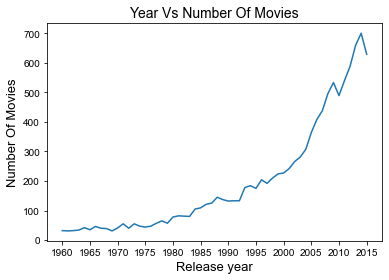

In [17]:
# make group for each year and count the number of movies in each year 
data=reader.groupby('release_year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
reader.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

#### After Seeing the plot and the output we can conclude that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).

###  Question 2 : Which Movie Has The Highest Or Lowest Profit?

In [18]:
#calculate Profit for each of the movie
#add a new column in the dataframe name 'Profit'
reader['Profit'] = reader['revenue'] - reader['budget']

In [19]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = reader[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = reader[x].idxmax()
    high = pd.DataFrame(reader.loc[high_index,:])
    low = pd.DataFrame(reader.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",reader['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",reader['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


> The first column shows the highest profit made by a movie and second column shows the highest in loss movie in this dataset.

>As we can see that **'Avatar'** movie Directed by James Cameron earn the highest profit in all, making over 2.5B in profit in this dataset.And the most in loss movie in this dataset is **The Warrior's Way**. Going in loss by more than 400M was directed by Singmoo Lee.


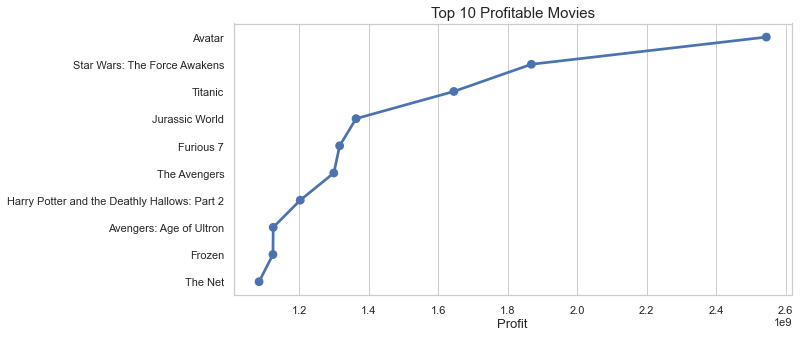

In [20]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
info = pd.DataFrame(reader['Profit'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

###  Question 3 : Movie with Highest And Lowest Budget?

In [21]:
#find the movie with highest and lowest budget.
#use 'find_minmax' function which i made earlier.
#make sure that movie with budget zero didn't affect the result.
#so change the zero into NAN in budget column.
reader['budget'] = reader['budget'].replace(0,np.NAN)
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Fear Clinic


,2244,1151
id,46528,287524
popularity,0.25054,0.177102
budget,425000000.0,1.0
revenue,11087569,0
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


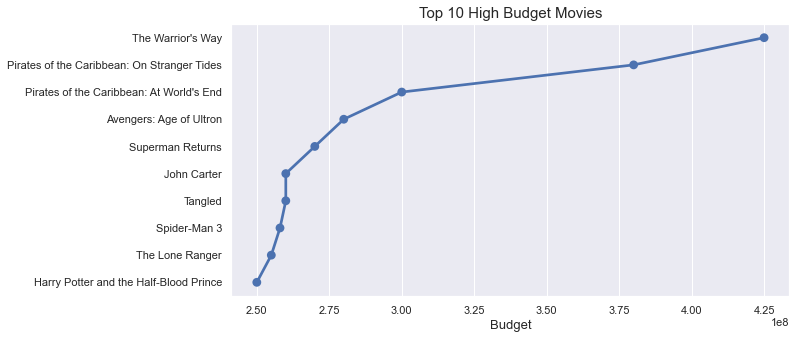

In [22]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(reader['budget'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

###  Question 4 : Movie with Largest And Lowest Earned Revenue?

In [23]:
#find the movie with highest and lowest earned revenue
#use 'find_minmax' function which i made earlier
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
popularity,9.432768,2.93234
budget,237000000.0,30000000.0
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
keywords,culture clash|future|space war|space colony|so...,gambling|bodyguard|remake
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama


> The first column shows the highest revenue made by a movie and second column shows the lowest revenue movie in this dataset. As we can see that **'Avatar'** movie Directed by James Cameron made the highest revenue in all, making over 2.78B revenue in this dataset. And the movie which made lowest revenue is **'Wild Card'** directed by Simon West.

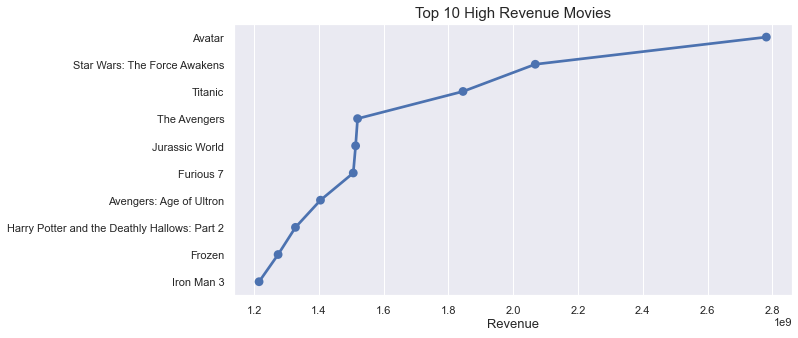

In [24]:
#top 10 movies which made highest revenue.
#sort the 'revenue' column in decending order and store it in the new dataframe.
info = pd.DataFrame(reader['revenue'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

###  Question 5 : Movie with Longest And Shortest Rintime?

In [25]:
#find the movie with longest and shortest runtime.
#use 'find_minmax' function which i made earlier by passsing 'runtime' as argument.
#it can't be possible a movie with zero runtime,but dataset contain some data like this.
#so update zero with NAN in runtime column.
reader['runtime'] = reader['runtime'].replace(0,np.NAN)
find_minmax('runtime')

Movie Which Has Highest runtime :  The Story of Film: An Odyssey
Movie Which Has Lowest runtime  :  Fresh Guacamole


,3894,4883
id,125336,142563
popularity,0.006925,0.078472
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,NaN
runtime,900.0,2.0
genres,Documentary,Animation


> So again the first column shows the runtime of the highest and second the lowest with column names as the index number.

> I have never heard a runtime of a movie so long, Runtime of 900 min, that's approx 15 hrs! So **'The Story of Film: An Odyssey'** movie has the highest runtime. This movie contain 6 or 7 parts that's why it is so long.

> The name of the movie with shortest runtime is **Fresh Guacamole**, runtime of just 2 min! Woah! I have never seen such a short movie in my lifetime.

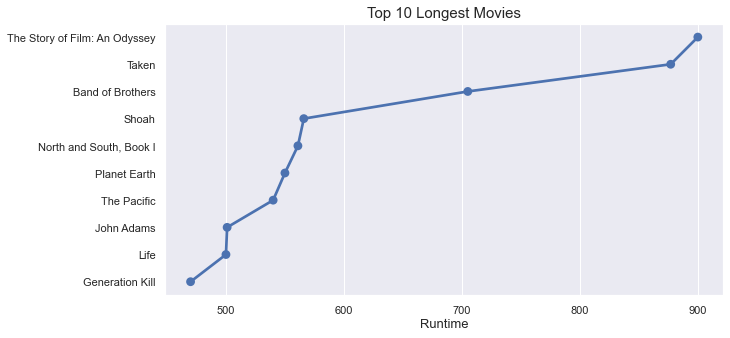

In [26]:
#top 10 Movies With Longest runtime
#sort the 'runtime' column in decending order and store it in the new dataframe.
info = pd.DataFrame(reader['runtime'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 longest duraton movies data from the list and dataframe.
x = list(data[:10])
y = list(info['runtime'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

###  Question 6 : Movie with Highest And Lowest Votes?

In [27]:
#find the movie with most and least votes.
#use 'find_minmax' function which i made earlier by passsing 'Vote_average' as argument.
find_minmax('vote_average')

Movie Which Has Highest vote_average :  The Story of Film: An Odyssey
Movie Which Has Lowest vote_average  :  Transmorphers


,3894,7772
id,125336,25055
popularity,0.006925,0.12112
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director,Mark Cousins,Leigh Scott
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,futuristic
runtime,900.0,86.0
genres,Documentary,Action|Adventure|Science Fiction


> The first column containt the movie with highest votes and second column contain the movie with lowest votes.<br>
> As we can see that movie **'The Story of Film: An Odyssey'** has the maximum rating (92%), which was directed by Mark Cousins and movie with lowest user ratings is **'Transmorphers'** with 15% user ratings, which was directed by Leigh Scott.

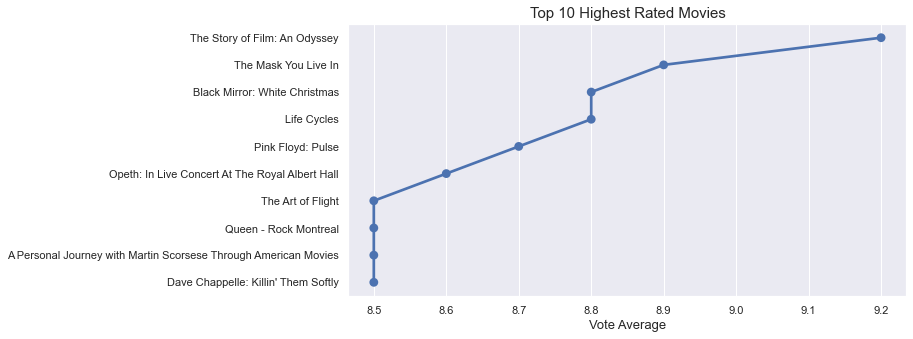

In [28]:
#top 10 highets rated movies.
#sort the 'vote_average' column in decending order and store it in the new dataframe.
info = pd.DataFrame(reader['vote_average'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['vote_average'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

###  Question 7 : Which Year Has The Highest Profit Rate?

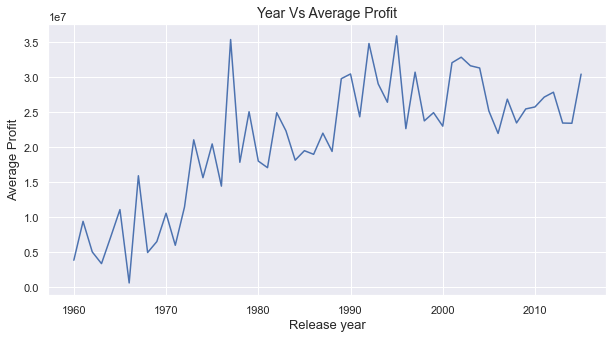

In [29]:
#do year-wise analysis of profit earn by movies in each earn.
#take the average of profit made by movies in each year and plot.
#make the group of the data according to their release_year and find the mean profit and plot.
reader.groupby('release_year')['Profit'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year Vs Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

> **According to the plot year 2002-03 he most profitable years And the profit was very low between the years 1960 and 1970.** 

###  Question 8 : Which length movies most liked by the audiences according to their popularity?

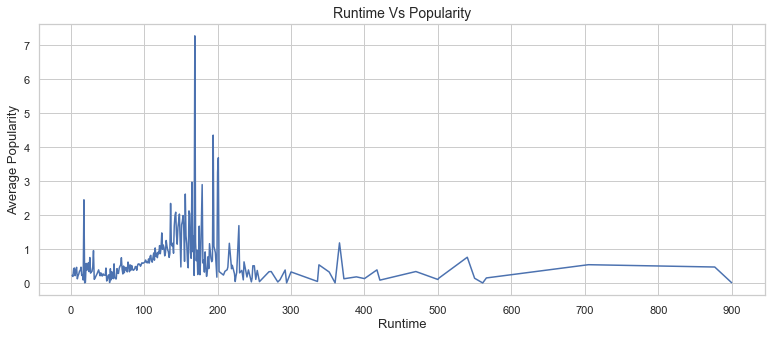

In [30]:
#use groupby function and group the data according to their runtime.
#make a plot using their popularity and find which length movies are most popular.

#make the group of the data according to their runtime and find the mean popularity related to this and plot.
reader.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

> **According to the plot we can say that movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.**  

###  Question 9: Average Runtime Of Movies From Year To Year?

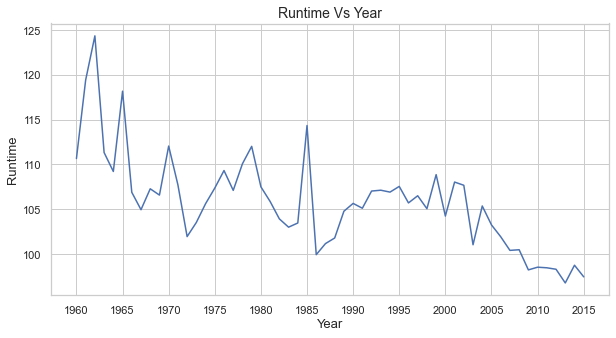

In [31]:
#how the runtime of the movies differ year to year.

#make the group of the data according to their release_year and find the mean  related to this and plot.
reader.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

> **According to the plot movie duration is decreasing year to year and it's TRUE. Because at this time nobody want to watch the long duration movies because it is quite boring. That's why the average runtime duraion of the movies are arround 100 Minutes.** 

###  Question 10: How Does The Revenue And Popularity differs Budget And Runtime? And How Does Popularity Depends On Profit?

Correlation Between Revenue And Budget :  0.6885561524636727


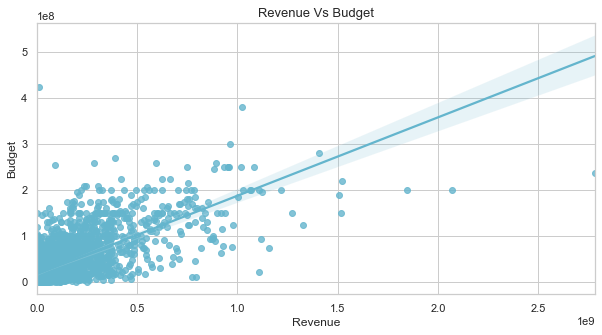

In [32]:
#how does revenue change according to their budget.
#make a scatter plot using 'regplot' between ''revenue' and 'budget'.
ax = sns.regplot(x=reader['revenue'], y=reader['budget'],color='c')

#set the title and labels of the figure
ax.set_title("Revenue Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#find the correlation between them
#change zero into NAN in budget and revenue column for the exact calculation.
reader['budget'] = reader['budget'].replace(0,np.NAN)
reader['revenue'] = reader['revenue'].replace(0,np.NAN)
reader['Profit'] = reader['Profit'].replace(0,np.NAN)

#find the correlation using 'corr()' function.
#it returns a dataframe which contain the correlation between all the numeric columns.
data_corr = reader.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])

Correlation Between Release Year And Vote Average :  -0.11757558609467468


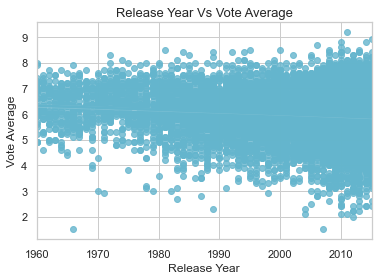

In [33]:
#how does vote average(ratings) change according to the release year.
#make a scatter plot using 'regplot' between 'year' and 'vote average'.
ax = sns.regplot(x=reader['release_year'], y=reader['vote_average'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Release Year Vs Vote Average",fontsize=13)
ax.set_xlabel("Release Year",fontsize=12)
ax.set_ylabel("Vote Average",fontsize=12)

#set the figure size and print the correlation between them.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")
print("Correlation Between Release Year And Vote Average : ",data_corr.loc['release_year','vote_average'])

Correlation Between Popularity And Profit :  0.6159162443059019


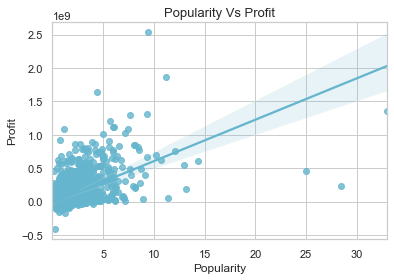

In [34]:
#how does vote average(ratings) change according to the release year.
#make a scatter plot using 'regplot' between 'year' and 'vote average'.
ax = sns.regplot(x=reader['popularity'],y=reader['Profit'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#find the correlation between them.
print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','Profit'])


> **These Are Estimated Values They Can Be Differ.**
- **1. Budget vs Revenue  :**  Budget and revenue both have **positive correlation(0.68)** between them. Means there is a good possibility that movies with higher investments result in better revenues.
- **2. Profit Vs Budget  : **  Profit And Budget both have **positive correlation(0.53)** between them. Means there is a good possibility that movies with higher investments result in better Profit.
- **3. Release Year Vs Vote Average : ** Release year and vote Average have **negative correlation(-0.11)**. Means that movie ratings(vote average) does not depends on the release year.
- **4. Popularity Vs Profit : ** Popularity and profit have **positive correlation(0.61)**. It means that movie with high popularity tends to earn high profit.

###  Question 11: Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?

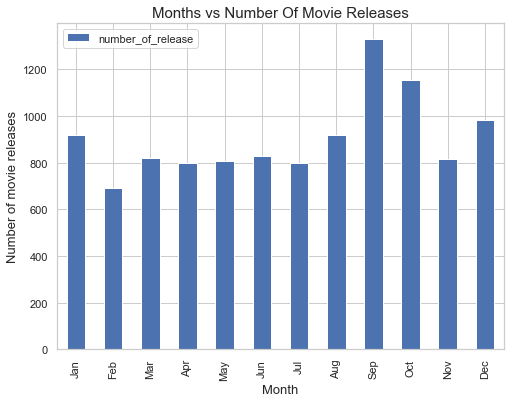

In [35]:
#extract the month number from the release date.
month_release = reader['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")


>**According to the plot we can conclude that there are higher number of release in september and october month.**

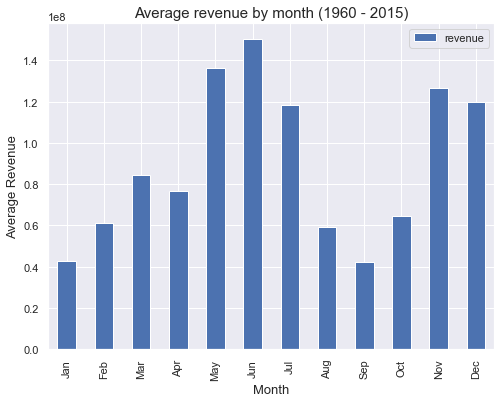

In [36]:
#which month made the highest average revenue?.
#make a dataframe with in which store the release month of each movie.
month_release = pd.DataFrame(month_release)

#change the column name of the new dataframe 'month_release'.
month_release.rename(columns = {'release_date':'release_month'},inplace=True)

#add a new column 'revenue' in the dataframe 'month_release'.
month_release['revenue'] = reader['revenue']

#make the group of the data according to their month and calculate the mean revenue of each month.
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

#make the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

#setup the title and lables of the plot.
plt.title('Average revenue by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

> **According tp the plot we can say that movie which release in may or june month made the high revenue in comparison of other month release. Or it can be happened because of outliers.**

###  Question 12:  Which Genre Has The Highest Release Of Movies?

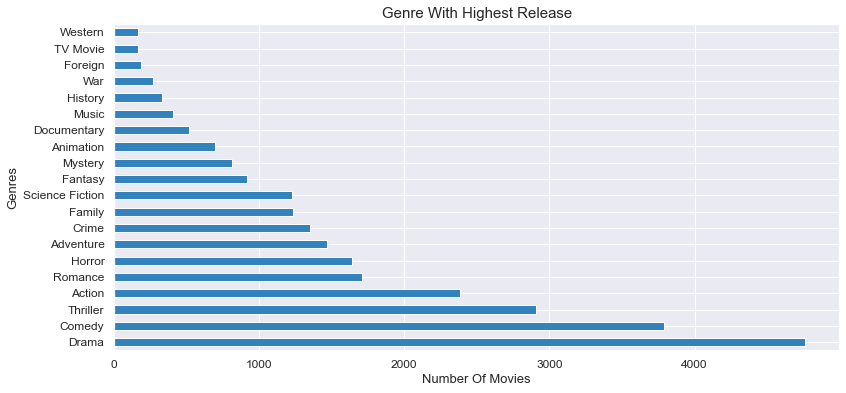

In [37]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = reader[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

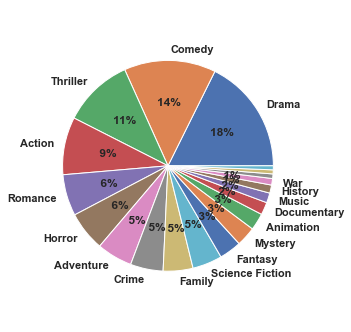

In [38]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

> **According to the plot Drama(4761) genre has the highest release of movies followed by Comedy(3793) and Thriller(2908).**

###  Question 13: Which genres are most popular from year to year?

In [39]:
#map all the rows of genres in a list.
genre_details = list(map(str,(reader['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

#make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.array(reader['release_year'])
popularity = np.array(reader['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [40]:
#calculate the standard deviation for the accurate results.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.753047,1.338265,1.996432,1.398764,0.550490,1.124313,0.951448,1.817532,1.534066,1.097634,...,0.608896,0.520337,0.755137,0.977663,1.034638,0.586530,0.732253,0.755530,1.174435,1.614759
Science Fiction,-0.467064,-0.361952,-0.640003,-0.646572,-0.667888,-0.869288,0.097082,-0.634089,1.452081,-0.710447,...,-0.285369,-0.305635,0.082456,0.679288,-0.104266,0.212188,0.189865,0.575138,0.902119,1.231957
Fantasy,-0.528631,-0.744050,-0.691929,-0.895883,-0.012691,-0.992961,-0.585750,-0.706100,-0.055098,-0.771756,...,0.064256,0.322410,0.008741,0.178378,0.153510,0.028812,0.081027,-0.182739,-0.108344,-0.320493
Crime,-0.607773,-0.111525,-0.192078,-0.020849,0.082887,-0.523188,-0.034184,0.517043,0.209143,0.593035,...,0.085715,0.302191,0.298300,-0.395319,-0.171136,-0.059809,0.092316,0.347388,-0.219402,0.027262
Western,0.705451,-0.588007,-0.266409,-0.863575,-1.009777,-0.527569,-0.028313,-0.775331,-0.824684,0.996730,...,-1.032584,-1.024569,-1.058297,-1.111565,-0.974311,-0.992158,-0.868553,-0.974491,-0.925887,-0.759302


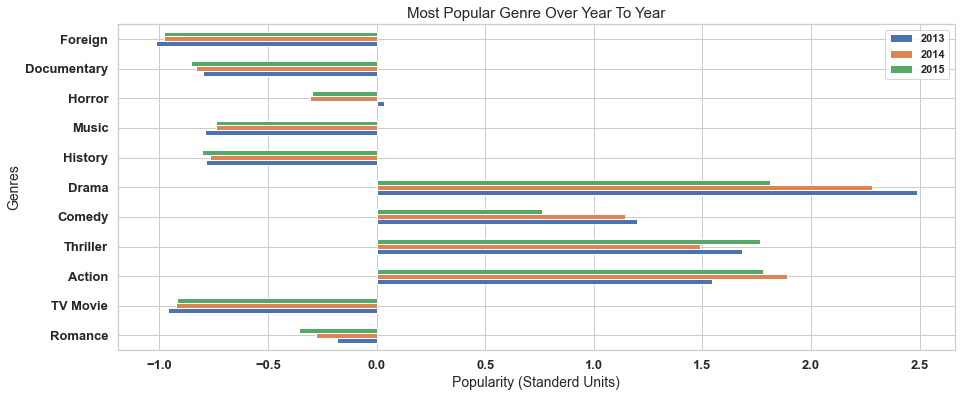

In [41]:
#plot the barh plot of the standardised data.
popular_genre.iloc[10:,53:].plot(kind='barh',figsize = (15,6),fontsize=13)

#setup the title and labels of the plot.
plt.title("Most Popular Genre Over Year To Year",fontsize=15)
plt.xlabel("Popularity (Standerd Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")

<AxesSubplot:>

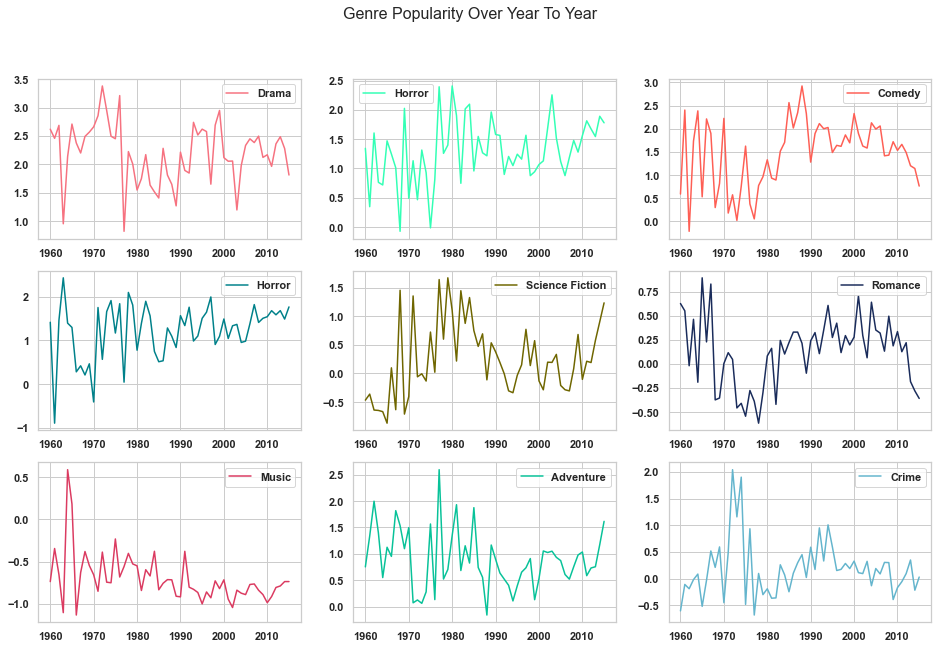

In [42]:
#How the popularity of the genre differ year by year.
sns.set_style("whitegrid")
#make a subplot of size 3,3.
fig, ax = plt.subplots(3,3,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genre Popularity Over Year To Year',fontsize = 16)

#plot the 'Drama' genre plot see the popularity difference over year to year.
popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)

#plot the 'Action' genre plot see the popularity difference over year to year.
popular_genre.loc['Action'].plot(label = "Horror",color='#33FFB5',ax = ax[0][1],legend=True)

#plot the 'Comedy' genre plot see the popularity difference over year to year.
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)

#accordig to the previous plot the 'Thriller','Science Fiction', 'Romance', 'Music','Adventure' and 'Crime'.
popular_genre.loc['Thriller'].plot(label = "Horror",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Music'].plot(label = "Music",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='c',ax = ax[2][2],legend=True)

###  Question 14: Most Frequent Actor?

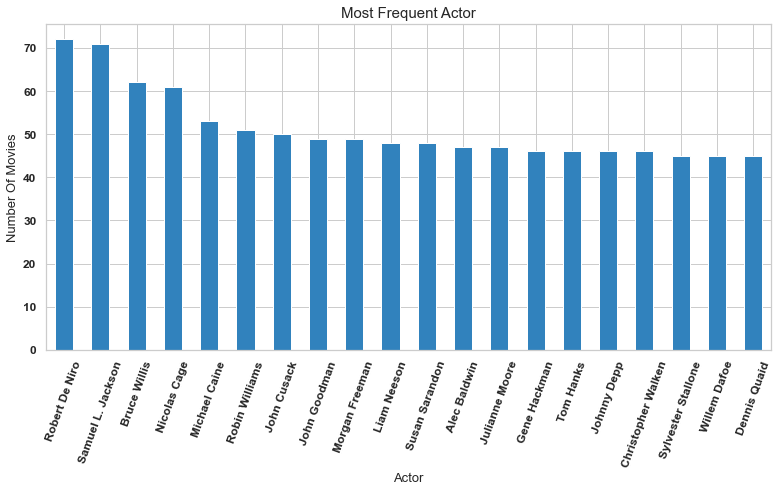

In [43]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor_flims = count_genre('cast')

#plot the barh plot.
count_actor_flims.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

> **According to the plot we can say that "Robert De Nitro" and "Samuel L. Jackson" are the most frequent actors.**  

###  Question 15: Top 20 Production Companies With Higher Number Of Release?

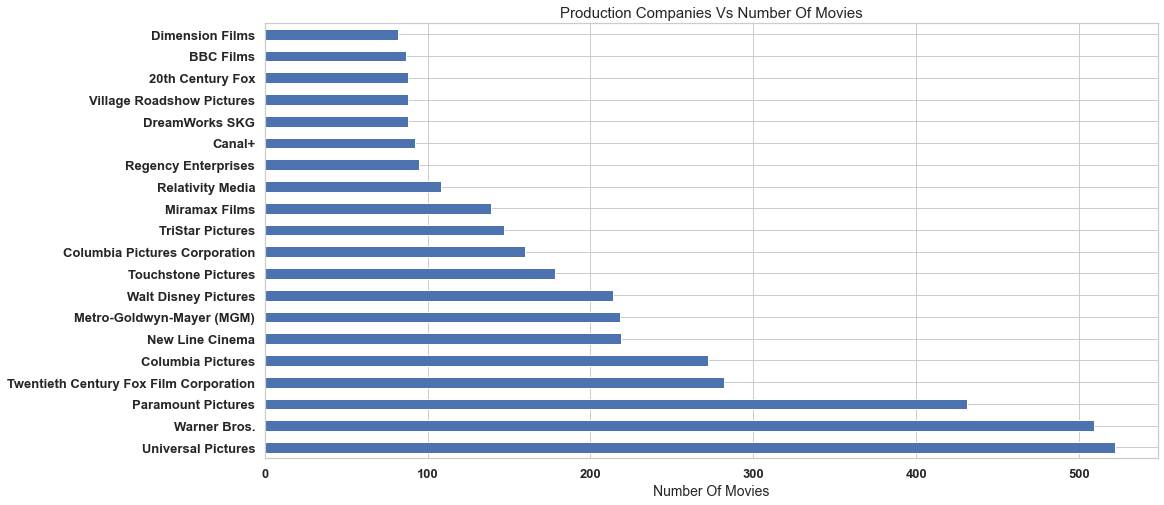

In [44]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies released by each production company.
production_companies = count_genre('production_companies')

#plot he barh plot.
production_companies.iloc[:20].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
sns.set_style("whitegrid")

> **According to the plot we can say that "Universal Pictures" has the highest number of released movies.**  

###  Question 16: Life Time Profit Earn By Each Production Company

In [45]:
##map all the rows of production_companies in a list.
data1 = list(map(str,(reader['production_companies'])))
production_companies = pd.DataFrame(production_companies)

#make the list of profit and production_companies which contain all the rows of profit and production_companies column. 
data3 = list(production_companies.index.values)
#append the nan in the data3 because production_companies row has null values also.
data3.append('nan')
reader['Profit'] = reader['Profit'].replace(np.NAN,0)
profit = np.array(reader['Profit'])

#make a null dataframe which indexs are genres and has only one column Total Profit.
companies_df = pd.DataFrame(index = data3 ,columns =np.arange(0,1,1) )
#change all the values of the dataframe from NAN to zero.
companies_df = companies_df.fillna(value = 0.0)

z = 0
for i in data1:
    split_companies = list(map(str,i.split('|')))
    companies_df.loc[split_companies] = companies_df.loc[split_companies] + profit[z]
    z+=1

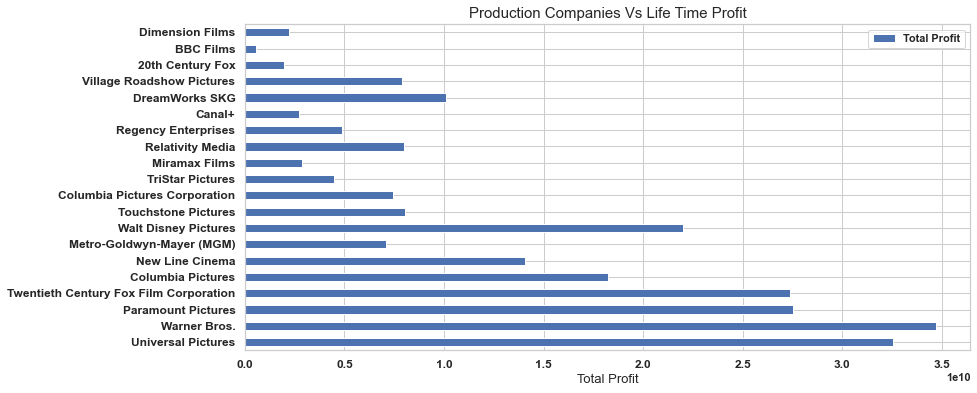

In [46]:
#Rename the column name 
companies_df = companies_df.rename(columns={0:'Total Profit'})
#plot the barh plot
companies_df[:20].plot.barh(figsize=(13,6),fontsize=12,legend=True)
plt.title("Production Companies Vs Life Time Profit",fontsize=15)
plt.xlabel('Total Profit',fontsize=13)
sns.set_style("whitegrid")

> **According to the plot we can say that "Warner Bros" has the highest lifetime profit.**  

###  Question 17 :   Top 20 Director Who Directs Maximum Movies?

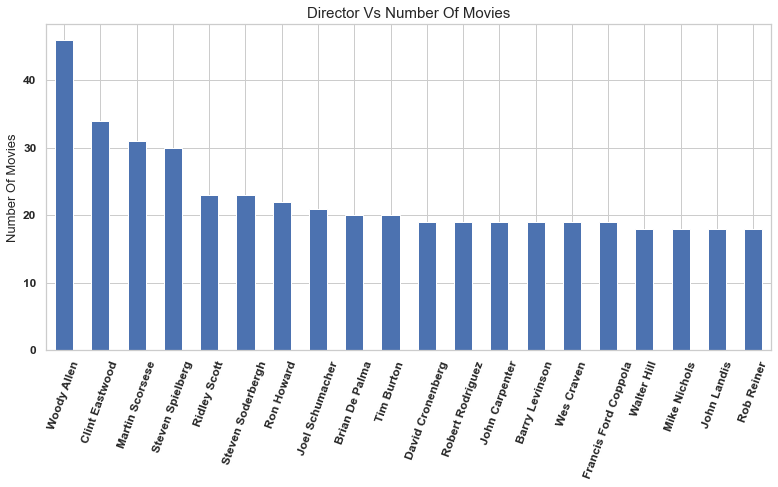

In [47]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies directed by each diretor.
count_director_movies = count_genre('director')

#plot a barh graph
count_director_movies.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels 
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

> **According to the plot we can say that "Woody Allen" has the highest number of released movies.**  

###  Question 18: What Kind Of Properties Are Associated With Movies With High Revenue?

In [48]:
info = pd.DataFrame(reader['revenue'].sort_values(ascending=False))
data_set = ['id','popularity','budget','original_title','cast','director','runtime','genres','vote_average','release_year']
for i in data_set:
    info[i] = reader[i]
info.head(3)

,revenue,id,popularity,budget,original_title,cast,director,runtime,genres,vote_average,release_year
1386,2.781506e+09,19995,9.432768,237000000.0,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,7.1,2009
3,2.068178e+09,140607,11.173104,200000000.0,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,7.5,2015
5231,1.845034e+09,597,4.355219,200000000.0,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,7.3,1997


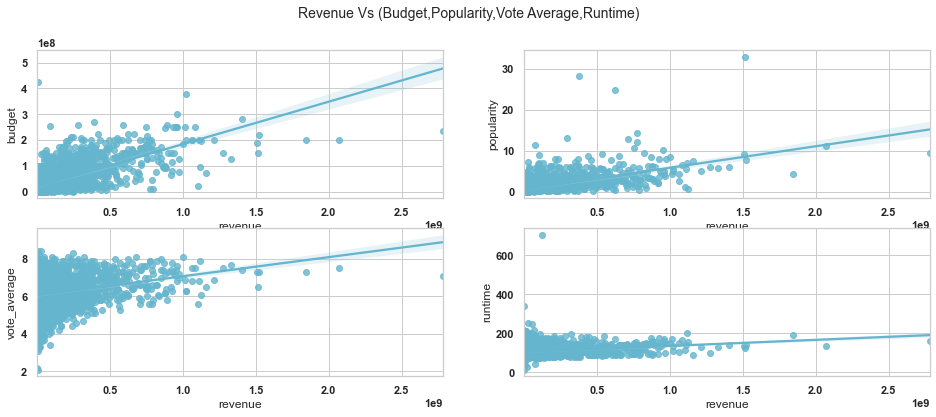

In [49]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=14)
#info.plot(x = ['revenue'],y = ['budget'],kind = "scatter",ax = axes[0][0])
sns.regplot(x=reader['revenue'], y=reader['budget'],color='c',ax=axes[0][0])
sns.regplot(x=reader['revenue'], y=reader['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=reader['revenue'], y=reader['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x=reader['revenue'], y=reader['runtime'],color='c',ax=axes[1][1])
#axes.scatter(info['revenue'],info['vote_average'])
sns.set_style("whitegrid")

In [50]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

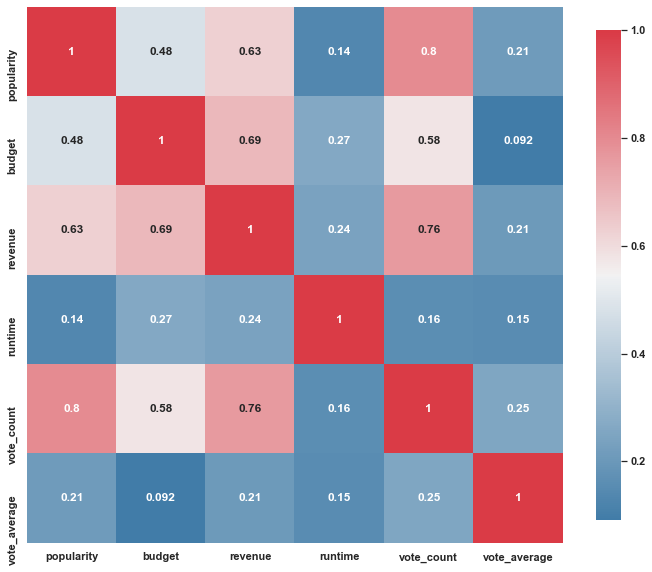

In [51]:
plot_correlation_map(reader[['popularity','budget','revenue','runtime','vote_count','vote_average']])

A brief description of the above plots,

**Plot 1: Budget vs Revenue**

The revenues do increase slightly at higher levels but the number of movies with high budgets seem scarce. There is a good possibility that movies with higher investments result in better revenues.
- Correlation = 0.68

I can't find a relationship here. The revenues don't seem to change with higher vote average.

**Plot 2: Popularity vs Revenue **

The revenue seems to be increasing with popularity. We can say that if the popularity of movie is high then the revenue of the movie may be high.
- Correlation = 0.62

**Plot 3: Vote Average vs Revenue **

The correlation between revenue and vote average is **0.2069**. So vote average is not highly related to the revenue.

**Plot 4: Runtime vs Revenue **

The correlation between revenue and runtime is **0.2378**. So runtime is not highly related to the revenue.

<a id='conclusions'></a>
## Conclusions

> 
- Drama is the most popular genre, following by action, comedy and thriller.
- Drame, Comedy, Thriller and Action are four most-made genres. 
- Maximum Number  Of Movies Release In year 2014.
- 'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.
- Short or Long duration movies are more popular than long duration movies.
- Average runtime of the movies are decreasing year by year.
- May,june,november and december are most popular month for releasing movies, if you want to earn more profit.
- Revenue is directly connected to the budget.
- Warner Bros, Universal Pictures and Paramount Pictures production companies earn more life time profit than other production companies.
- Movies with higher budgets have shown a corresponding increase in the revenues.


>**Limitations** 
- It's not 100 percent guaranteed solution that this formula is gonna work, But it shows us that we have high probability of making high profits if we had similar characteristics as such. If we release a movie with these characteristics, it gives people high expectations from this movie. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of.
- During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.